In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
results_max_step_exp_path = 'results_max_step_exp/'
results_path = 'results/'
results_max_step_exp = {
    'checkpoint_index': [],
    'MASE': [],
    'WQL': []
}

In [59]:
for i in range(50, 1000 + 1, 50):
    results_cp_i = pd.read_csv(results_max_step_exp_path + f"chronos-t5-small-lora-cp{i}-agg-rel-scores.csv")['value']
    results_max_step_exp['checkpoint_index'].append(i)
    results_max_step_exp['MASE'].append(results_cp_i[0])
    results_max_step_exp['WQL'].append(results_cp_i[1])

In [60]:
result_cp_final = pd.read_csv("results/" + f"chronos-t5-small-lora-agg-rel-scores.csv")
result_cp_final = list(result_cp_final[result_cp_final['benchmark'] == 'fine-tuned']['value'])

results_max_step_exp['checkpoint_index'].append(1001)
results_max_step_exp['MASE'].append(result_cp_final[0])
results_max_step_exp['WQL'].append(result_cp_final[1])

<Axes: xlabel='checkpoint_index'>

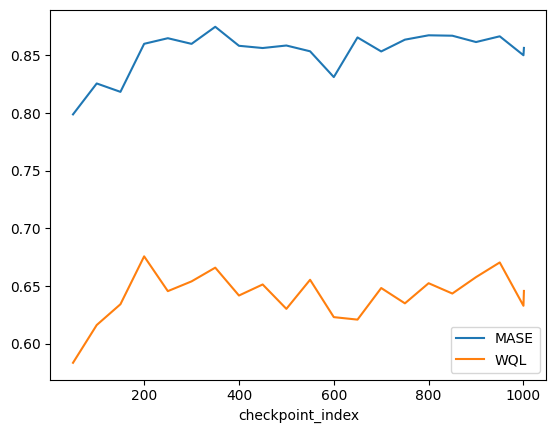

In [61]:
pd.DataFrame(results_max_step_exp).set_index('checkpoint_index').plot()

In [62]:
models_evaluated = ['tiny', 'small', 'small-lora']
bench_mark = ['in-domain', 'zero-shot', 'fine-tuned']

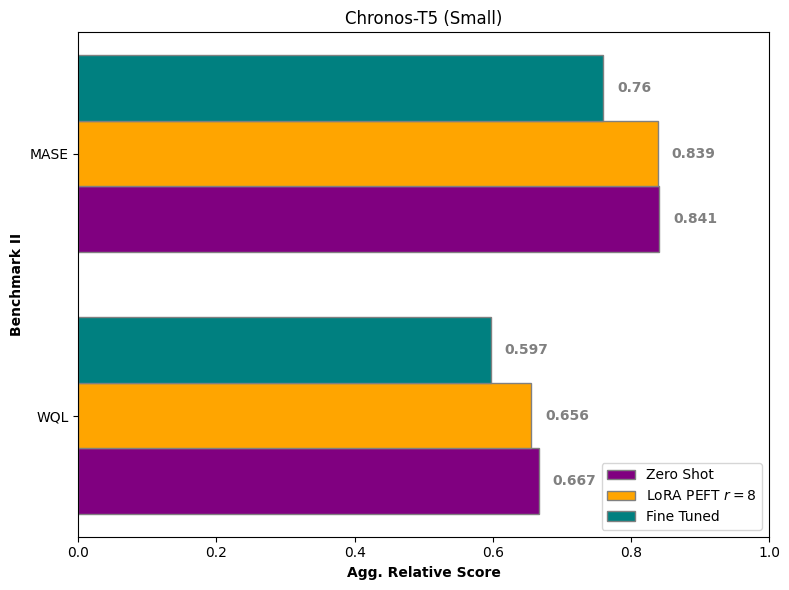

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
benchmarks = ['WQL', 'MASE']
zero_shot_scores = [0.667, 0.841]
fine_tuned_scores = [0.597, 0.760]
lora_peft_scores = [0.656, 0.839]

# Altura y posiciones
bar_height = 0.25
r1 = np.arange(len(benchmarks))
r2 = [x + bar_height for x in r1]
r3 = [x + bar_height for x in r2] 

# Configurar gráfico horizontal
plt.figure(figsize=(8, 6))
plt.barh(r1, zero_shot_scores, color='purple', height=bar_height, edgecolor='grey', label='Zero Shot')
plt.barh(r2, lora_peft_scores, color='orange', height=bar_height, edgecolor='grey', label='LoRA PEFT $r=8$')
plt.barh(r3, fine_tuned_scores, color='teal', height=bar_height, edgecolor='grey', label='Fine Tuned')

# Etiquetas y título
plt.ylabel('Benchmark II', fontweight='bold')
plt.xlabel('Agg. Relative Score', fontweight='bold')
plt.title('Chronos-T5 (Small)')
plt.yticks([r + bar_height for r in r1], benchmarks)
plt.xlim(0, 1)

# Leyenda
plt.legend()

# Anotaciones de valores
for i in range(len(r1)):
    plt.text(zero_shot_scores[i] + 0.02, r1[i], str(zero_shot_scores[i]), va='center', color='grey', fontweight='bold')
    plt.text(lora_peft_scores[i] + 0.02, r2[i], str(lora_peft_scores[i]), va='center', color='grey', fontweight='bold')
    plt.text(fine_tuned_scores[i] + 0.02, r3[i], str(fine_tuned_scores[i]), va='center', color='grey', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
pd.read_csv(results_path + "")

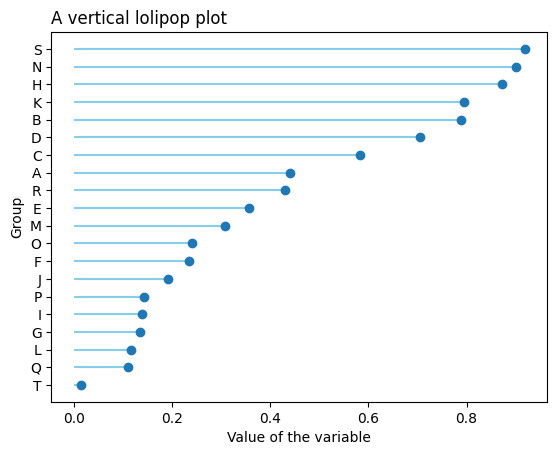

In [52]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
# Create a dataframe
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })
 
# Reorder it based on the values
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# Show the plot
plt.show()